In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# file = 'Otodom_3p'
file = 'otodomScrapRAWData'
df = pd.read_csv(file + '.csv')
df.shape

(17478, 14)

In [107]:
print('BALCONY-GARDEN-TERRACE')
print(df['balcony_garden_terrace'].value_counts())

# Replace non-numeric values with NaN
df['num_of_room'] = pd.to_numeric(df['num_of_room'].str.strip(), errors='coerce')

# If you want to replace NaN values with a specific integer (e.g., 11), you can do this:
df['num_of_room'].fillna(11.0, inplace=True)

df['num_of_room'] = df['num_of_room'].astype('int16')

['4 ' '2 ' '3 ' '6 ' '1 ' '5 ' 'więcej niż 10' '8 ' '7 ' '9 ' '10 ']


In [108]:
df.dtypes

time_scraping             object
otodom_id                 object
price                     object
title                     object
surface_area              object
num_of_room                int16
floor                     object
form_of_property          object
finish_condition          object
balcony_garden_terrace    object
parking_space             object
heating                   object
ad_link                   object
map_link                  object
dtype: object

In [109]:
# Define the list of choices
choices = ['Balkon', 'Taras', 'Garaz', 'Plwnica', 'Winda']

# Function to generate a string of random choices
def generate_random_choices(num_choices):
    return ', '.join(np.random.choice(choices, size=num_choices))

# Generate a string of random choices for each missing value in 'balcony_garden_terrace'
random_values = [generate_random_choices(np.random.randint(1, 4)) for _ in range(df['balcony_garden_terrace'].isnull().sum())]

# Create a Series from the random values with the same index as the missing values in 'balcony_garden_terrace'
random_values_series = pd.Series(random_values, index=df.loc[df['balcony_garden_terrace'].isnull(), 'balcony_garden_terrace'].index)

# Fill the missing values in 'balcony_garden_terrace' with the random values
df['balcony_garden_terrace'].fillna(random_values_series, inplace=True)

In [110]:
df.sample(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link
1651,2024-06-10 01:09:18,3-pokojowe-mieszkanie-63m2-ogrodek-bezposredni...,Zapytaj o cenę,3-pokojowe mieszkanie 63m2 + ogródek Bezpośrednio,"63,72 m²",3,parter/1,pełna własność,do wykończenia,ogródek,NaN,NaN,https://www.otodom.pl/pl/oferta/3-pokojowe-mie...,"https://www.google.com/maps/@52.167578,21.1712..."
1502,2024-06-10 00:46:21,wyjatkowy-apartament-w-konstancinie-jeziornej-...,2 200 000 zł,Wyjątkowy apartament w Konstancinie Jeziornej,"161,4 m²",5,1/2,pełna własność,NaN,balkon,garaż/miejsce parkingowe,miejskie,https://www.otodom.pl/pl/oferta/wyjatkowy-apar...,"https://www.google.com/maps/@52.088253,21.0819..."
16426,2024-06-11 06:44:12,ciche-mieszkanie-dobry-dojazd-wawer-lasy-parki...,996 639 zł,Ciche mieszkanie / dobry dojazd - Wawer lasy p...,"67,94 m²",3,4/5,pełna własność,NaN,balkon,garaż/miejsce parkingowe,miejskie,https://www.otodom.pl/pl/oferta/ciche-mieszkan...,"https://www.google.com/maps/@52.23782,21.13897..."
3455,2024-06-10 05:32:19,m3-dla-rodziny-blisko-pkp-tramwaj-7min-do-metr...,793 000 zł,"M3 dla Rodziny, blisko PKP, tramwaj 7min do METRA",56 m²,3,5/7,pełna własność,do wykończenia,balkon,garaż/miejsce parkingowe,miejskie,https://www.otodom.pl/pl/oferta/m3-dla-rodziny...,"https://www.google.com/maps/@52.283148,21.0231..."
6652,2024-06-10 14:27:19,gotowy-lokal-85-86-mkw-stan-deweloperski-ID4qQAA,1 778 360 zł,Gotowy lokal 85.86 mkw stan deweloperski,"85,86 m²",2,parter/8,NaN,do wykończenia,"Winda, Taras, Winda",NaN,miejskie,https://www.otodom.pl/pl/oferta/gotowy-lokal-8...,"https://www.google.com/maps/@52.2257545,20.981..."


In [111]:
df.isnull().sum()

time_scraping                0
otodom_id                    0
price                        0
title                        0
surface_area                 0
num_of_room                  0
floor                      346
form_of_property          3164
finish_condition          2521
balcony_garden_terrace       0
parking_space             6532
heating                   5916
ad_link                      0
map_link                     0
dtype: int64

In [112]:
# df['price'] = df['price'].str.replace('zł', '').str.replace(' ', '').str.replace(',', '.').astype(int) # error when 'ask' in price
df['price'] = pd.to_numeric(df['price'].str.replace('zł', '').str.replace(' ', ''), errors='coerce').astype('Int64')

In [113]:
df['surface_area'] = pd.to_numeric(df['surface_area'].str.replace(',', '.').str.replace('m²', '').str.replace(' ', ''), errors='coerce')

In [114]:
# Split the 'floor' column
df[['floor', 'num_floors_in_building']] = df['floor'].str.split('/', expand=True)

# Replace 'parter' with 0 in the 'floor' column
df['floor'] = df['floor'].replace('parter', '0').replace('> 10', '11')

# Convert 'floor' and 'num_floors_in_building' to numeric
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').astype('Int16')
df['num_floors_in_building'] = pd.to_numeric(df['num_floors_in_building'], errors='coerce').astype('Int16')

In [115]:
df['num_of_room'] = df['num_of_room'].astype('Int16')

In [116]:
# Create a dictionary of Polish words and their English translations
translation_dict = {
    'spółdzielcze wł. prawo do lokalu': 'cooperative ownership right to the premises',
    'pełna własność': 'full ownership',

    'do zamieszkania': 'for living',
    'do wykończenia': 'for finishing',
    'do remontu': 'for renovation',

    'Winda': 'Elevator',
    'Plwnica': 'Laundry',
    'Balkon': 'Balcony',
    'Taras': 'Terrace',
    'Garaz': 'Garage',

    'garaż/miejsce parkingowe': 'garage/parking space',

    'miejskie': 'municipal',
    'gazowe': 'gas',
    'kotłownia': 'boiler room',
    'elektryczne': 'electric',
    'inne': 'other',
}

# Replace the Polish words with the English translations in the DataFrame
df.replace(translation_dict, inplace=True)

In [117]:
print('\nFORM-OF-PROPERTY')
print(df['form_of_property'].value_counts())
print('\nFINISH-CONDITION')
print(df['finish_condition'].value_counts())


FORM-OF-PROPERTY
form_of_property
full ownership                                 13421
cooperative ownership right to the premises      820
udział                                            44
użytkowanie wieczyste / dzierżawa                 29
Name: count, dtype: int64

FINISH-CONDITION
finish_condition
for living        7721
for finishing     6122
for renovation    1114
Name: count, dtype: int64

BALCONY-GARDEN-TERRACE
balcony_garden_terrace
balkon                    8957
ogródek                    991
balkon, taras              826
taras                      638
ogródek, taras             466
                          ... 
Winda, Garaz, Garaz          6
Balkon, Garaz, Balkon        5
taras, balkon, ogródek       4
ogródek, balkon              3
balkon, taras, ogródek       1
Name: count, Length: 167, dtype: int64


In [118]:
print('\nPARKING-SPACE')
print(df['parking_space'].value_counts())
print('\nHEATING')
print(df['heating'].value_counts())


PARKING-SPACE
parking_space
garage/parking space    10946
Name: count, dtype: int64

HEATING
heating
municipal        9279
gas              1320
other             655
boiler room       222
electric           83
piece kaflowe       3
Name: count, dtype: int64


In [119]:
# Step 2: Split the 'balcony_garden_terrace' column values into lists
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].str.split(',')

# Step 3: Apply the translation to each item in the list
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].apply(
    lambda lst: list(set([translation_dict.get(item.strip(), item.strip()) for item in lst]))
    )

# Step 4: Join the translated items back into a comma-separated string
df['balcony_garden_terrace'] = df['balcony_garden_terrace'].apply(', '.join)

In [120]:
# Extract the latitude and longitude from the 'map_link' column
df[['latitude', 'longitude']] = df['map_link'].str.extract('@(.*?),(.*?),', expand=True)

# Convert 'latitude' and 'longitude' to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [121]:
df.head(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link,num_floors_in_building,latitude,longitude
0,2024-06-09 17:11:35,4-pokojowe-mieszkanie-73m2-balkon-bezposrednio...,1109400,4-pokojowe mieszkanie 73m2 + balkon Bezpośrednio,73.06,4,1,full ownership,for finishing,balkon,garage/parking space,NaN,https://www.otodom.pl/pl/oferta/4-pokojowe-mie...,"https://www.google.com/maps/@52.1964005,20.952...",7,52.196401,20.952040
1,2024-06-09 17:11:41,2-pokojowe-mieszkanie-47m2-ogrodek-bezposredni...,<NA>,2-pokojowe mieszkanie 47m2 + ogródek Bezpośrednio,47.87,2,0,full ownership,for finishing,"ogródek, taras",NaN,NaN,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,"https://www.google.com/maps/@52.1128681,20.973...",3,52.112868,20.973348
2,2024-06-09 17:11:45,lux-3-pokoje-kamienica-centrum-przy-pkin-ID4qVcj,1255000,"LUX 3 pokoje, KAMIENICA, Centrum, przy PKiN!",42.00,3,4,full ownership,for living,balkon,NaN,municipal,https://www.otodom.pl/pl/oferta/lux-3-pokoje-k...,"https://www.google.com/maps/@52.23313,21.019,1...",6,52.233130,21.019000
3,2024-06-09 17:11:49,conrada-8-2-pokoje-z-ogrodkiem-ID4p6uM,980000,"Conrada 8, 2 pokoje z ogródkiem",60.00,2,0,full ownership,for living,ogródek,garage/parking space,municipal,https://www.otodom.pl/pl/oferta/conrada-8-2-po...,"https://www.google.com/maps/@52.2722504,20.928...",7,52.272250,20.928295
4,2024-06-09 17:11:54,sloneczne-mieszkanie-w-okolicy-stacji-metra-ID...,880000,Sloneczne mieszkanie w okolicy stacji metra,49.90,2,7,NaN,for living,Terrace,NaN,municipal,https://www.otodom.pl/pl/oferta/sloneczne-mies...,"https://www.google.com/maps/@52.2387216,20.961...",7,52.238722,20.961506


In [122]:
df.sample(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link,num_floors_in_building,latitude,longitude
7292,2024-06-10 15:34:44,dwupoziomowe-mieszkanie-z-duzym-ogrodem-ID4qP5e,1150000,Dwupoziomowe mieszkanie z dużym ogrodem,160.00,5,1,full ownership,for living,"balkon, ogródek, taras",garage/parking space,NaN,https://www.otodom.pl/pl/oferta/dwupoziomowe-m...,"https://www.google.com/maps/@52.32956,21.09267...",2,52.329560,21.092670
7748,2024-06-10 16:30:09,dwa-pokoje-stegny-zielona-okolica-ID4q75K,649000,"Dwa pokoje, Stegny, Zielona okolica.",42.50,2,3,cooperative ownership right to the premises,for living,"Terrace, Elevator",NaN,municipal,https://www.otodom.pl/pl/oferta/dwa-pokoje-ste...,"https://www.google.com/maps/@52.1820173,21.047...",4,52.182017,21.047431
15658,2024-06-11 05:32:07,4-pokojowe-mieszkanie-89m2-balkon-bez-prowizji...,<NA>,4-pokojowe mieszkanie 89m2 + balkon Bez Prowizji,89.87,4,4,full ownership,for finishing,balkon,garage/parking space,NaN,https://www.otodom.pl/pl/oferta/4-pokojowe-mie...,"https://www.google.com/maps/@52.2389401,21.137...",5,52.238940,21.137523
7646,2024-06-10 16:17:24,mieszkanie-48m2-trzy-pokoje-ul-przasnyska-ID4qO1l,655000,Mieszkanie 48m2 trzy pokoje ul Przasnyska,48.00,3,2,cooperative ownership right to the premises,for living,balkon,NaN,municipal,https://www.otodom.pl/pl/oferta/mieszkanie-48m...,"https://www.google.com/maps/@52.2604177,20.968...",3,52.260418,20.968473
16795,2024-06-11 07:16:33,atrakcyjny-apartament-przy-alejach-jerozolimsk...,1399000,Atrakcyjny apartament przy Alejach Jerozolimsk...,100.80,4,2,full ownership,for living,balkon,NaN,municipal,https://www.otodom.pl/pl/oferta/atrakcyjny-apa...,"https://www.google.com/maps/@52.1975277,20.927...",3,52.197528,20.927835


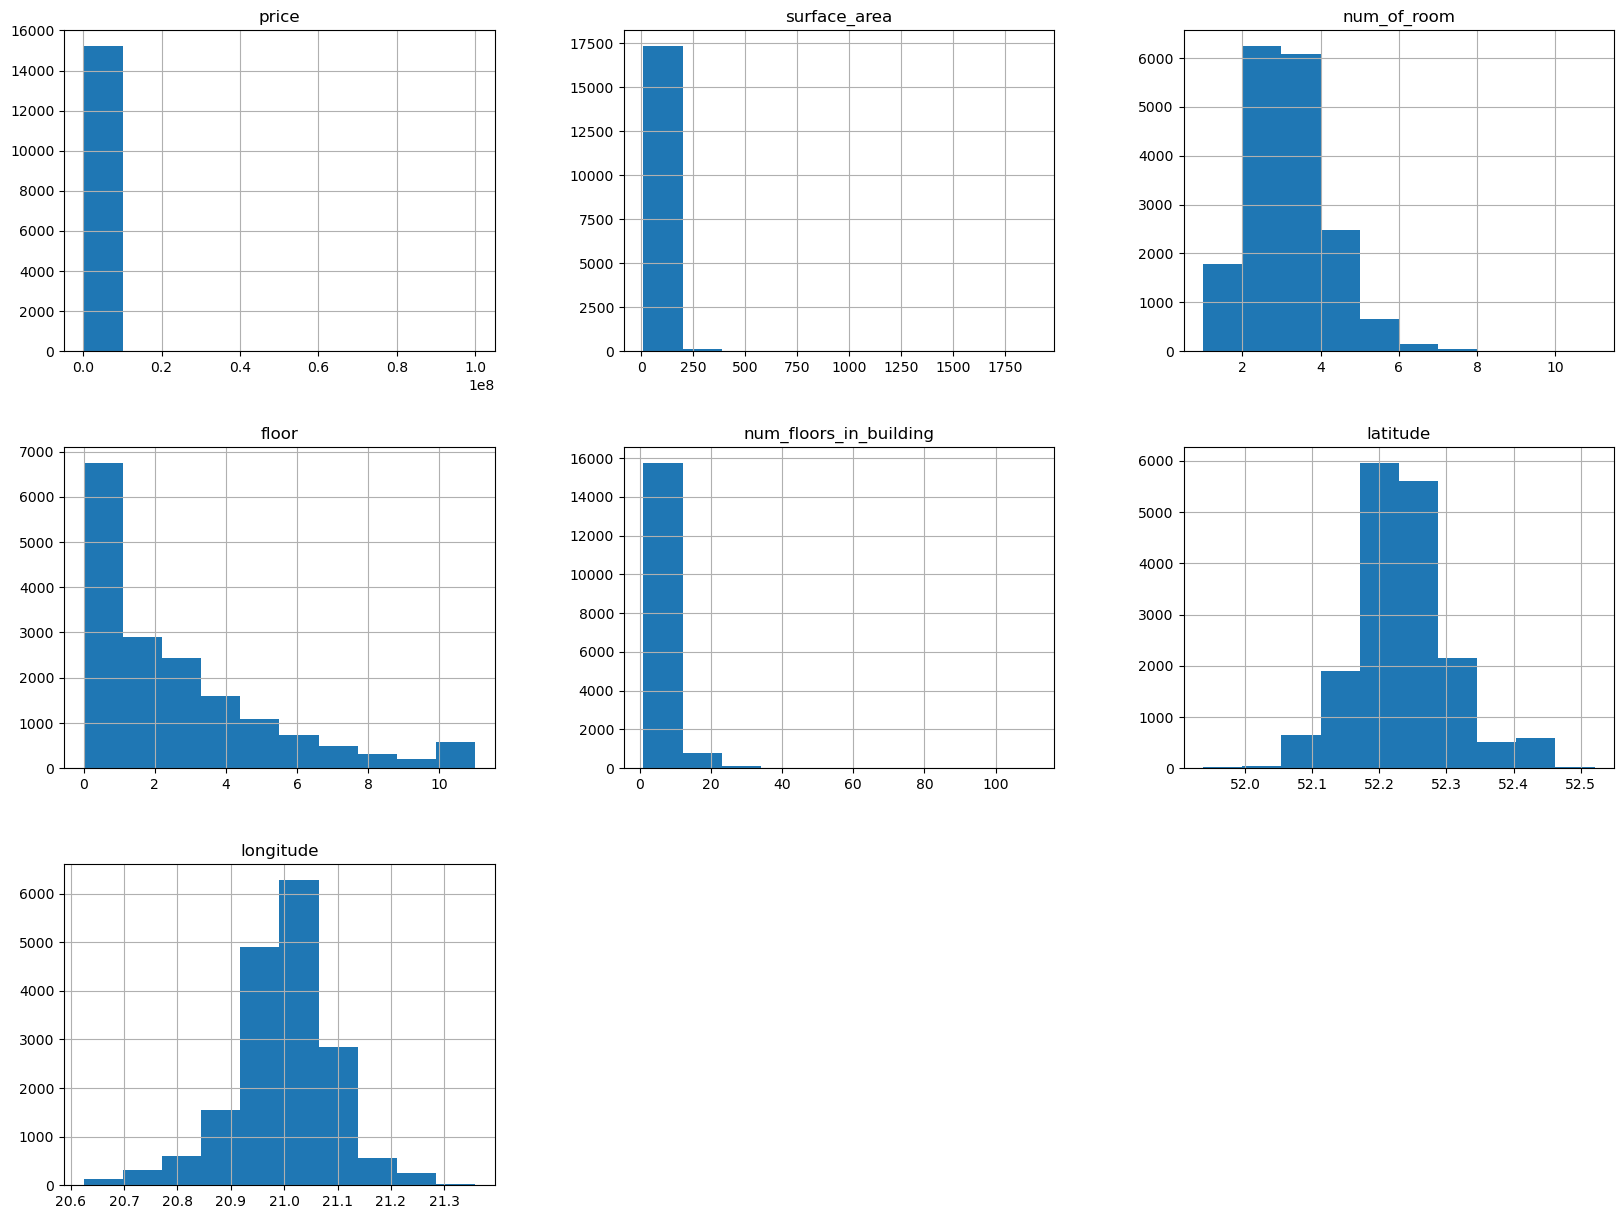

In [123]:
import matplotlib.ticker as ticker

ax = df.hist(figsize=(20,15))

# for sub_ax in ax.flatten():
#     sub_ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

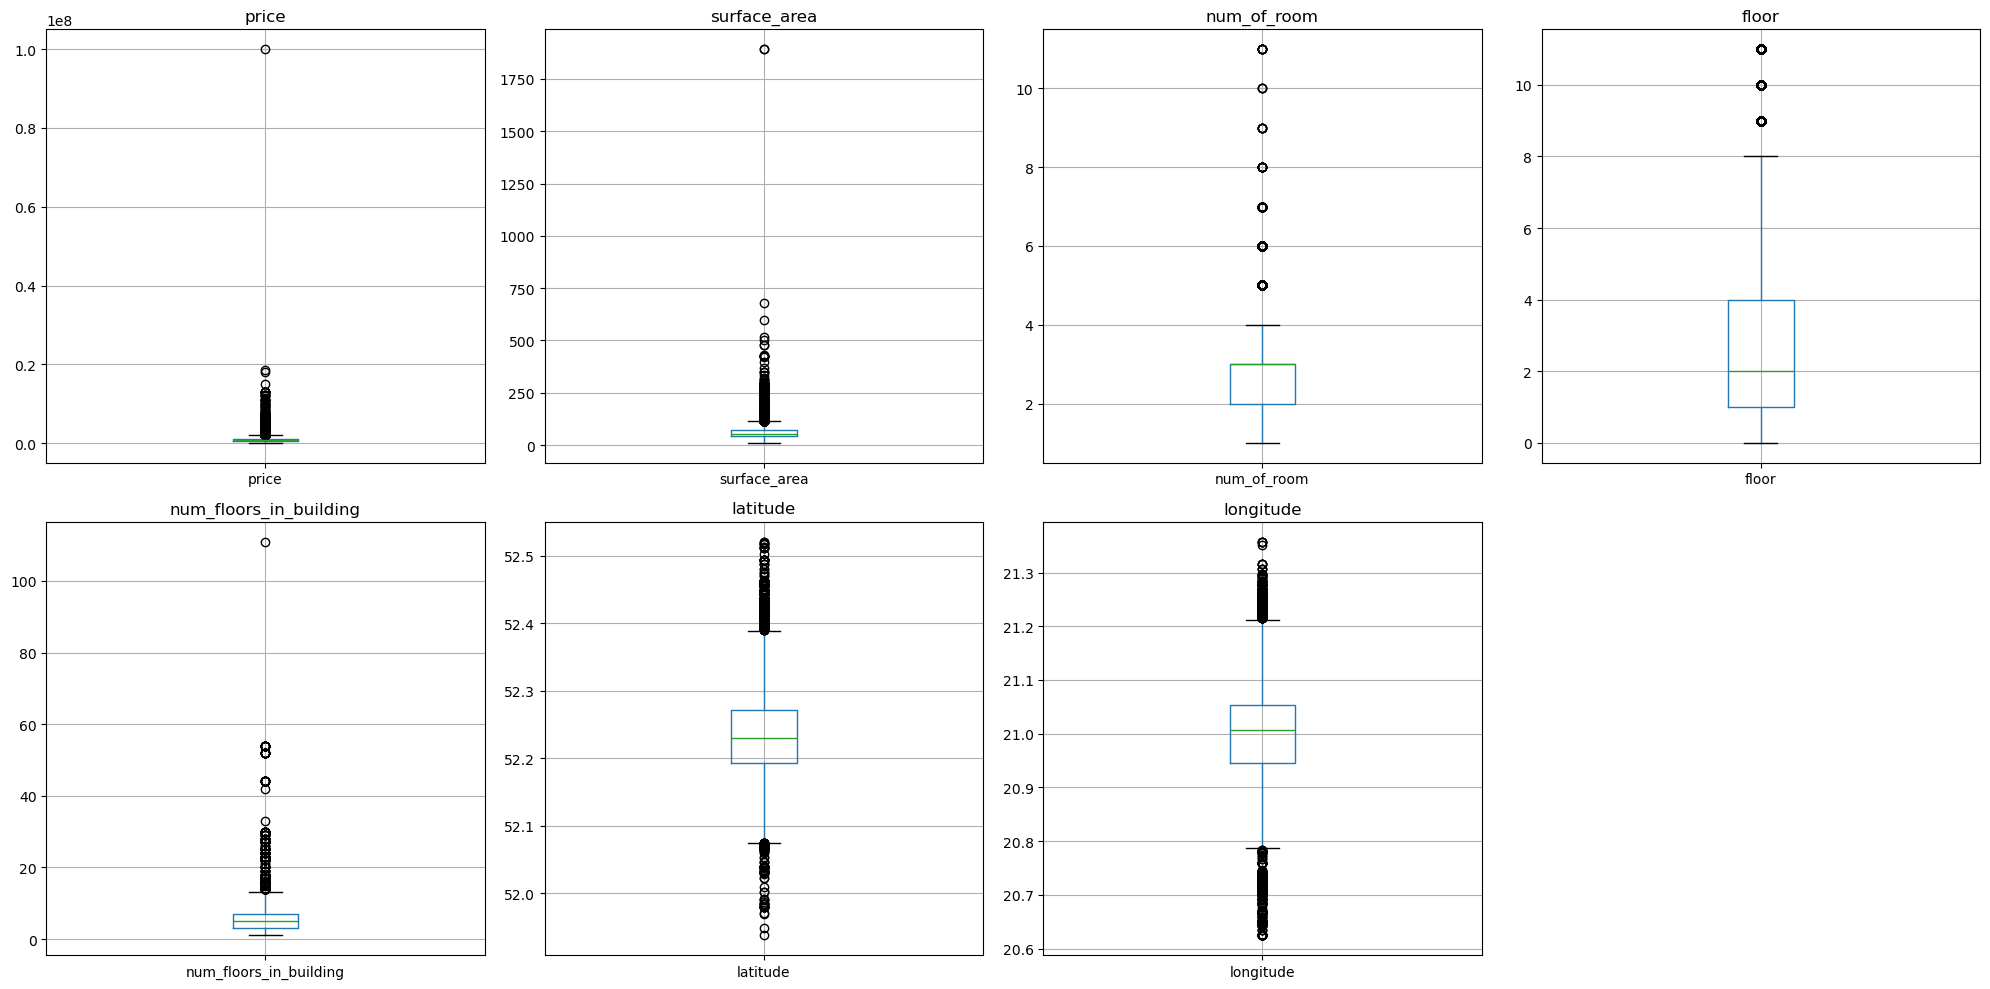

In [124]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Number of columns and rows for the subplot grid
num_cols = 4
num_rows = int(np.ceil(len(numerical_cols.columns) / num_cols))

# Create a figure and axes with a subplot for each column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*5))

# Loop over the columns and create a boxplot for each one
for i, col in enumerate(numerical_cols.columns):
    ax = axs[i//num_cols, i%num_cols]
    numerical_cols[[col]].boxplot(ax=ax)
    ax.set_title(col)

# Remove empty subplots
if len(numerical_cols.columns) % num_cols != 0:
    for ax in axs.flatten()[len(numerical_cols.columns):]:
        ax.remove()

# Show the plot
plt.tight_layout()
plt.show()

In [125]:
df = df.drop(['time_scraping', 'otodom_id', 'title', 'ad_link', 'map_link'], axis=1)

In [126]:
df.head(5)

,price,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,num_floors_in_building,latitude,longitude
0,1109400,73.06,4,1,full ownership,for finishing,balkon,garage/parking space,NaN,7,52.196401,20.952040
1,<NA>,47.87,2,0,full ownership,for finishing,"ogródek, taras",NaN,NaN,3,52.112868,20.973348
2,1255000,42.00,3,4,full ownership,for living,balkon,NaN,municipal,6,52.233130,21.019000
3,980000,60.00,2,0,full ownership,for living,ogródek,garage/parking space,municipal,7,52.272250,20.928295
4,880000,49.90,2,7,NaN,for living,Terrace,NaN,municipal,7,52.238722,20.961506


In [127]:
new_columns_order = ['price', 'latitude', 'longitude', 'surface_area', 'num_of_room', 'floor', 'num_floors_in_building', 'finish_condition', 'form_of_property', 'balcony_garden_terrace', 'parking_space',	'heating']
df = df[new_columns_order]

In [128]:
# df.to_csv(file + '_cleaned.csv', index=False)

In [129]:
df = df[df['price'].notna()]
df.head(5)

,price,latitude,longitude,surface_area,num_of_room,floor,num_floors_in_building,finish_condition,form_of_property,balcony_garden_terrace,parking_space,heating
0,1109400,52.196401,20.952040,73.06,4,1,7,for finishing,full ownership,balkon,garage/parking space,NaN
2,1255000,52.233130,21.019000,42.00,3,4,6,for living,full ownership,balkon,NaN,municipal
3,980000,52.272250,20.928295,60.00,2,0,7,for living,full ownership,ogródek,garage/parking space,municipal
4,880000,52.238722,20.961506,49.90,2,7,7,for living,NaN,Terrace,NaN,municipal
7,849900,52.100217,21.051637,85.95,3,2,2,for living,full ownership,balkon,garage/parking space,gas


In [138]:
print("Max & Min Latitude: " + str(max(df['latitude'])) + " " + str(min(df['latitude'])))
print("Max & Min Longitude: " + str(max(df['longitude'])) + " " + str(min(df['longitude'])))

Max & Min Latitude: 52.52074 51.93743
Max & Min Longitude: 21.35776 20.624359


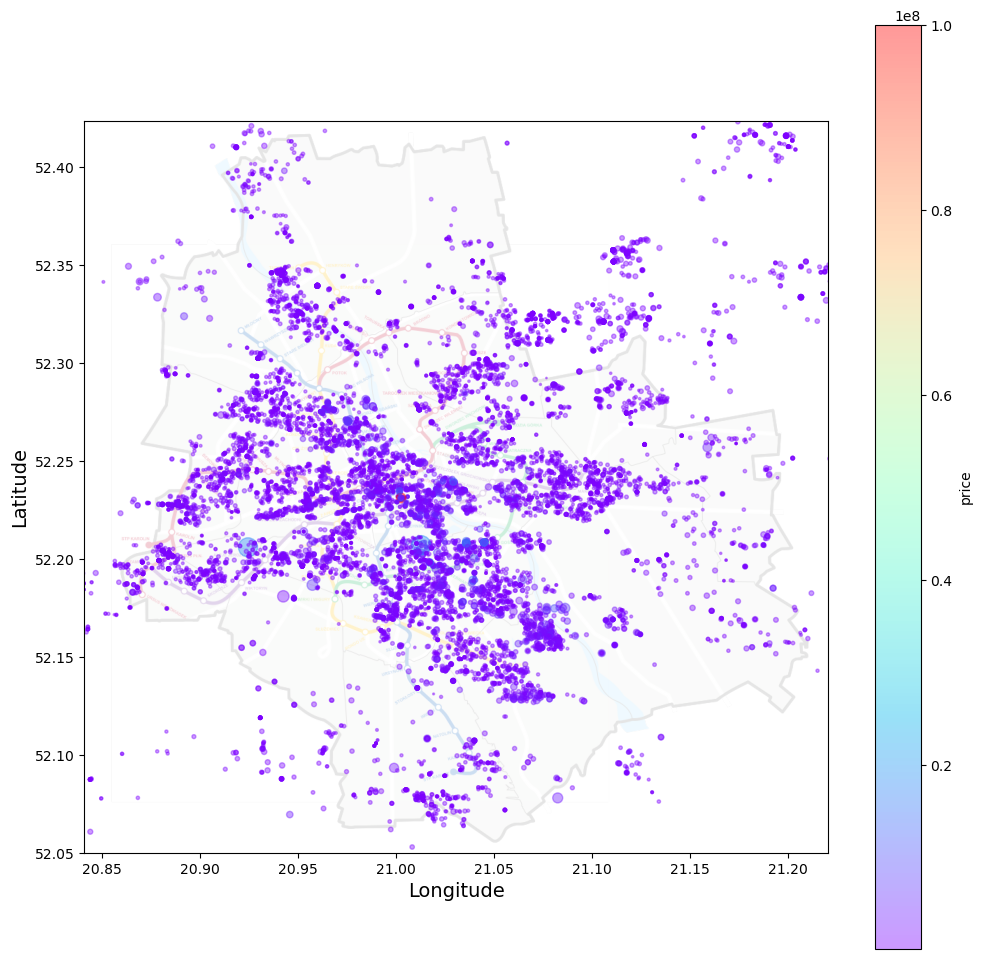

In [130]:
from PIL import Image

warsaw_metro_2050_image_url = r'C:\Users\Purn\Documents\GitHub\Otodom_Scrapper_Analysis\photos\Warszawa_metra_2050.png'

image = np.array(Image.open(warsaw_metro_2050_image_url))

# plot the populations with density and colors
ax = df.plot(kind = "scatter",
            x = "longitude",
            y = "latitude",
            alpha = 0.4,
            s = df["surface_area"]/10,
            figsize = (12,12),
            c = "price", cmap = plt.get_cmap("rainbow"),
            colorbar = True,
            sharex = True)

# Adjust the cali_image's x and y axis according to the longitutes and latitudes of the df.
# plt.imshow(image, extent=[20.840682, 21.220630, 52.109328, 52.353667], alpha=0.4) # works, but horizontal, original estimated coordinates
plt.imshow(image, extent=[20.840682, 21.220630, 52.05, 52.423667], alpha=0.2) # coordinates are adjustable
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# prices = df["price"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar(cmap = "rainbow")
# cbar.ax.set_yticklabels(["zł %dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('House Price', fontsize=16)

plt.show()

In [131]:
import statsmodels.api as sm

df_ = df[['price', 'surface_area', 'num_of_room', 'floor', 'num_floors_in_building']].dropna().astype(float)
X = df_.drop(['price'], axis=1)
y = df_[['price']]
print(X.dtypes)
print(y.dtypes)
print(X.shape)
print(y.shape)

surface_area              float64
num_of_room               float64
floor                     float64
num_floors_in_building    float64
dtype: object
price    float64
dtype: object
(14472, 4)
(14472, 1)


In [132]:
X = sm.add_constant(np.asarray(X))
y = np.asarray(y)
OLS_model = sm.OLS(y, X).fit()

print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     2384.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:28:59   Log-Likelihood:            -2.1973e+05
No. Observations:               14472   AIC:                         4.395e+05
Df Residuals:                   14467   BIC:                         4.395e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.096e+05   2.52e+04     -8.314      0.0

In [133]:
import plotly.express as px
px.imshow(df_.corr())

## Hypothesis Testing
### Null Hypothesis (H0): A <U>will-be-ready-to-live</U> house is cheaper than a <U>ready-to-live</U> house.
### Alternative Hypothesis (H1): A <U>will-be-ready-to-live</U> house is NOT cheaper so buying it will give no significant benefit for the buyer.

In [134]:
price_living = df[df['finish_condition'] == 'for living']['price'].astype(float)
price_finishing = df[df['finish_condition'] == 'for finishing']['price'].astype(float)
print(price_living.shape)
print(price_finishing.shape)
print(price_living.dtype)
print(price_finishing.dtype)

(7701,)
(3966,)
float64
float64


In [135]:
import scipy as sp
SIGNIFICANCE_LEVEL = 0.05

t_stat, p_value = sp.stats.ttest_ind(price_living, price_finishing)
print(t_stat, p_value)

rejecting = p_value < SIGNIFICANCE_LEVEL
print("NULL Hypth. H0: A will-be-ready-to-live house is cheaper than a ready-to-live house.")
print(("" if rejecting else "Not ") + "possible to reject the null hypothesis")

10.098040709988837 7.063963423373427e-24
NULL Hypth. H0: A will-be-ready-to-live house is cheaper than a ready-to-live house.
possible to reject the null hypothesis
